<Axes: >

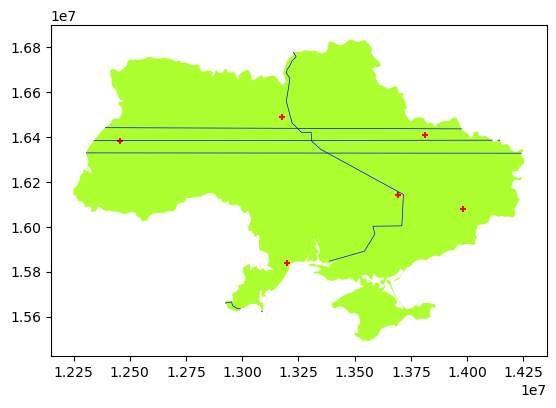

In [1]:
# Subimos la data
import os

import geopandas as gpd
from fiona import listlayers

ukraineMaps = 'https://github.com/ZurinaGarcia/simpleplot/raw/main/maps/ukraine_5641/ukraineMaps_5641.gpkg'

listlayers(ukraineMaps)
['country', 'cities', 'rivers']

ukraine = gpd.read_file(ukraineMaps, layer='country')
ukraine_cities = gpd.read_file(ukraineMaps, layer='cities')
ukraine_rivers = gpd.read_file(ukraineMaps, layer='rivers')

ukraine.crs.to_epsg() == ukraine_cities.crs.to_epsg() == ukraine_rivers.crs.to_epsg()

base = ukraine.plot(facecolor="greenyellow")
ukraine_rivers.plot(edgecolor='blue', linewidth=0.5, ax=base)
ukraine_cities.plot(marker='+', color='red', markersize=15, ax=base)


In [2]:
################### EJERCICIO 1 ###########################################
# En este caso, el país elegido, es un polígono
ukraine

,COUNTRY,geometry
0,Ukraine,"POLYGON ((13327503.247 15829957.740, 13332382...."


In [3]:
# Delineamos el borde del país
ukraine.boundary

0    LINESTRING (13327503.247 15829957.740, 1333238...
dtype: geometry

<Axes: >

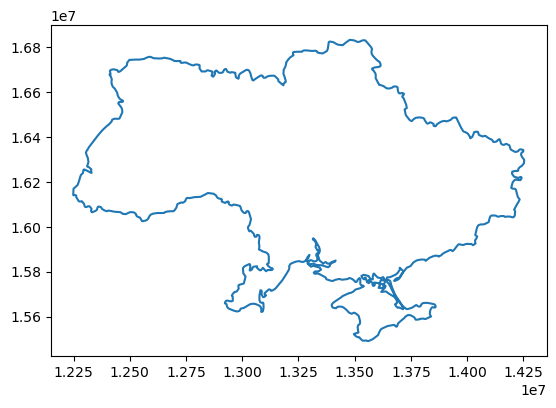

In [4]:
# Graficamos las líneas
ukraine.boundary.plot()

In [5]:
# Es una geoserie, solo me devuelve la geometría
type(ukraine.boundary)

geopandas.geoseries.GeoSeries

In [6]:
#convirtiendo a GDF
ukraine.boundary.to_frame()

,0
0,"LINESTRING (13327503.247 15829957.740, 1333238..."


In [7]:
# Convertimos
ukraine_border=ukraine.boundary.to_frame() 

# Cambiamos de nombre a la columna
ukraine_border['name']='Ukraine' 

# Nos aseguramos que lo tome como geometry
ukraine_border.rename(columns={0:'geometry'},inplace=True) 

# configuramos:
# LE ESTOY DICIENDO QUE LA GEOMETRÍA DEL DATAFRAME, SE LLAMA GEOMETRY. ASEGURA QUE LA COLUMNA QUE ANTES ERA LLAMADA 0, SEA RECONOCIDA
# COMO GEOMETRÍA
ukraine_border = ukraine_border.set_geometry("geometry")

# Verificamos:
ukraine_border.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
ukraine_border

,geometry,name
0,"LINESTRING (13327503.247 15829957.740, 1333238...",Ukraine


In [9]:
######################### EJERCICIO 2 ######################################

In [10]:
ukraine_states=gpd.read_file(os.path.join("maps","ukr_admbnda_sspe_20230201_shp","ukr_admbnda_adm1_sspe_20230201.shp"))
ukraine_municipalities=gpd.read_file(os.path.join("maps","ukr_admbnda_sspe_20230201_shp","ukr_admbnda_adm2_sspe_20230201.shp"))

In [11]:
ukraine_states.crs, ukraine_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

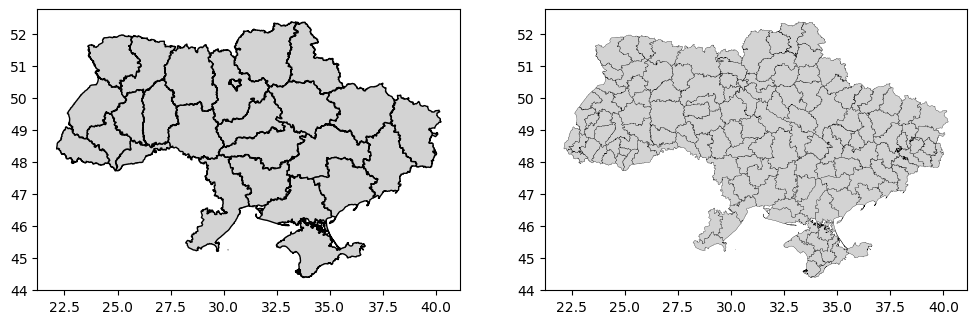

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ukraine_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
ukraine_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [13]:
ukraine_states.geometry.head()

0    MULTIPOLYGON (((35.37597 45.26085, 35.37507 45...
1    POLYGON ((32.12556 50.22478, 32.11470 50.21516...
2    POLYGON ((33.20020 52.37363, 33.20590 52.37325...
3    POLYGON ((25.83857 48.63352, 25.83895 48.63283...
4    POLYGON ((34.94829 49.19156, 34.94836 49.19153...
Name: geometry, dtype: geometry

In [14]:
ukraine_states.crs = "EPSG:4326"
ukraine_municipalities.crs = "EPSG:4326"

In [15]:
ukraine_states=ukraine_states.to_crs(5641)
ukraine_municipalities=ukraine_municipalities.to_crs(5641)

In [16]:
############################# EJERCICIO 3 ##########################################

In [17]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","uk-airports.csv"))


infoairports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,6467,UKBB,large_airport,Boryspil International Airport,50.345001,30.894699,427,EU,Ukraine,UA,...,Boryspil,1,UKBB,KBP,NaN,https://kbp.aero/en/,https://en.wikipedia.org/wiki/Boryspil_Interna...,"Borispol, Міжнародний аеропорт ""Бориспіль"", Kyiv",1600,2022-11-20T09:05:31+00:00
2,6478,UKKK,medium_airport,Ihor Sikorsky Kyiv International Airport (Zhul...,50.40194,30.45194,587,EU,Ukraine,UA,...,Kyiv,1,UKKK,IEV,NaN,https://iev.aero/,https://en.wikipedia.org/wiki/Kyiv_Internation...,"Міжнародний аеропорт ""Київ"", Kiev",750,2022-11-20T09:02:37+00:00
3,6487,UKOO,medium_airport,Odessa International Airport,46.4268,30.6765,172,EU,Ukraine,UA,...,Odessa,1,UKOO,ODS,NaN,http://www.airport.od.ua/,https://en.wikipedia.org/wiki/Odessa_Internati...,"Odesa Central, Міжнародний аеропорт Одеса",750,2021-11-20T16:17:31+00:00
4,6481,UKLL,large_airport,Lviv International Airport,49.8125,23.9561,1071,EU,Ukraine,UA,...,Lviv,1,UKLL,LWO,NaN,http://www.airport.lviv.ua/index.php?id=home&L=1,https://en.wikipedia.org/wiki/Lviv_Internation...,"Міжнародний аеропорт ""Львів""",1200,2021-08-01T05:06:08+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,342226,UA-0158,heliport,Oreanda Heliport,44.4513,34.1293,479,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:30:05+00:00
249,342227,UA-0159,heliport,Pension Wisteria Helipad,44.461824,34.145346,125,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:31:37+00:00
250,342228,UA-0160,heliport,Massandra Palace Heliport,44.5145,34.2039,971,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:36:03+00:00
251,342229,UA-0161,heliport,Artek Heliport,44.56059,34.307563,335,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:44:30+00:00


In [18]:
# limpiamos data
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# mantenemos las columnas que necesitamos
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           252 non-null    object
 1   type           252 non-null    object
 2   latitude_deg   252 non-null    object
 3   longitude_deg  252 non-null    object
 4   elevation_ft   132 non-null    object
 5   region_name    252 non-null    object
 6   municipality   228 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB


In [19]:
# convertimos
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# verificamos
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           252 non-null    object 
 1   type           252 non-null    object 
 2   latitude_deg   252 non-null    float64
 3   longitude_deg  252 non-null    float64
 4   elevation_ft   132 non-null    float64
 5   region_name    252 non-null    object 
 6   municipality   228 non-null    object 
dtypes: float64(3), object(4)
memory usage: 13.9+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

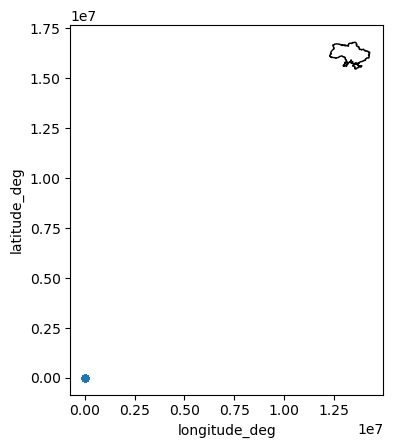

In [20]:
# vemos que falta acomodar
base = ukraine.plot(color='white', edgecolor='black') 

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [21]:
# CONVIRTIÉNDOLO EN DATA ESPACIAL:
# CUANDO YA ESTÁ PROYECTADO NO SE HABLA DE LONGITUD Y LATITUD
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected

In [22]:
airports=airports.to_crs(5641)

#PROYECTÁNDOLO

<Axes: >

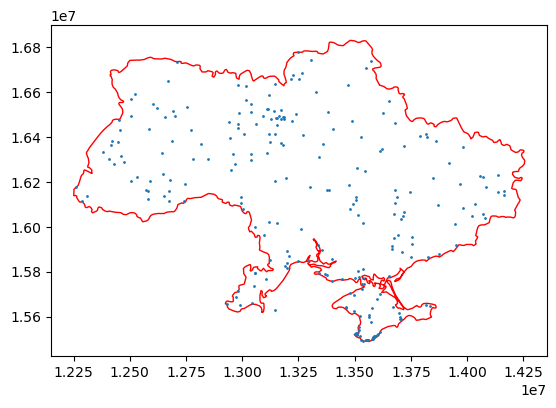

In [23]:
# ahora sí

base = ukraine.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [24]:
# observar que

type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [25]:
airports.rename(columns={'type':'kind'},inplace=True)

In [26]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)

LayerControl(collapsed=False).add_to(m) 

m

In [27]:
print(airports.head())  # revisamos la data:


                                                name            kind  \
0                     Boryspil International Airport   large_airport   
1  Ihor Sikorsky Kyiv International Airport (Zhul...  medium_airport   
2                       Odessa International Airport  medium_airport   
3                         Lviv International Airport   large_airport   
4                   Simferopol International Airport  medium_airport   

   latitude_deg  longitude_deg  elevation_ft                   region_name  \
0     50.345001      30.894699         427.0                   Kyiv Oblast   
1     50.401940      30.451940         587.0                   Kyiv (city)   
2     46.426800      30.676500         172.0                 Odessa Oblast   
3     49.812500      23.956100        1071.0                   Lviv Oblast   
4     45.052200      33.975101         639.0  Crimea (Autonomous Republic)   

  municipality                           geometry  
0     Boryspil  POINT (13220942.772 16469406.1

In [28]:
#################### EJERCICIO 4 #######################################
# 1. Compute the centroid of your country.

# 2. Combine all the polygons to the north, and also all the polygons to the south; use unary union.

# 3. Detect the amount of duplicates after the combination.

# 4. Plot both maps so that duplicates appear.
    

In [29]:
centroUkraine=ukraine.centroid
centroUkraine

0    POINT (13271446.964 16255307.991)
dtype: geometry

In [30]:
type(centroUkraine), type(centroUkraine.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [31]:
type(centroUkraine.x[0]),type(centroUkraine.y[0])

#VALORES NUMÉRICOS

(numpy.float64, numpy.float64)

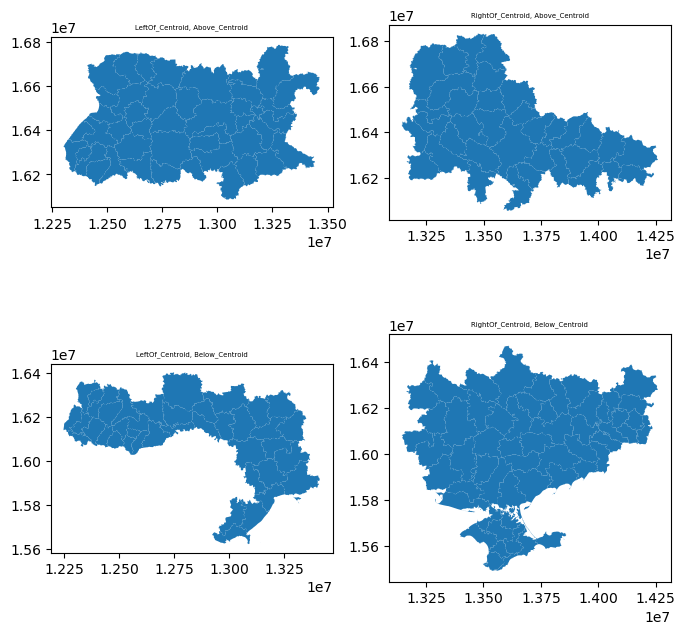

In [32]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroUkraine.x[0]
centroidY=centroUkraine.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
ukraine_municipalities.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
ukraine_municipalities.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
ukraine_municipalities.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
ukraine_municipalities.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

In [33]:
ukraine_municipalities.cx[:centroidX,centroidY:]

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
10,Vinnytskyi,Вінницький,Винницкий,UA0502,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.066637,0.850692,"POLYGON ((13060539.685 16350584.349, 13063835...."
11,Haisynskyi,Гайсинський,Гайсинский,UA0504,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.256638,0.691760,"POLYGON ((13063677.092 16258294.256, 13063321...."
12,Zhmerynskyi,Жмеринський,Жмеринский,UA0506,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.351904,0.386048,"POLYGON ((12897521.426 16283137.123, 12897574...."
15,Khmilnytskyi,Хмільницький,Хмельницкий,UA0512,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.774880,0.460291,"POLYGON ((12996749.501 16390416.191, 12996899...."
16,Volodymyrskyi,Володимирський,Владимирский,UA0702,NaN,Volynska,Волинська,Волынская,UA07,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.306323,0.326142,"POLYGON ((12483551.629 16600963.718, 12483595...."
17,Kamin-Kashyrskyi,Камінь-Каширський,Камень-Каширский,UA0704,NaN,Volynska,Волинська,Волынская,UA07,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.713821,0.607711,"POLYGON ((12590269.593 16755295.751, 12590269...."
18,Kovelskyi,Ковельський,Ковельский,UA0706,NaN,Volynska,Волинська,Волынская,UA07,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.041130,0.987119,"POLYGON ((12547559.182 16744035.138, 12547678...."
19,Lutskyi,Луцький,Луцкий,UA0708,NaN,Volynska,Волинська,Волынская,UA07,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,7.115648,0.669268,"POLYGON ((12681226.599 16618599.310, 12681897...."
35,Berdychivskyi,Бердичівський,Бердичевский,UA1802,NaN,Zhytomyrska,Житомирська,Житомирская,UA18,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.880038,0.376697,"POLYGON ((13003816.993 16436126.044, 13004091...."
36,Zhytomyrskyi,Житомирський,Житомирский,UA1804,NaN,Zhytomyrska,Житомирська,Житомирская,UA18,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,11.084196,1.325103,"POLYGON ((12956208.640 16543068.492, 12956064...."


In [34]:
ukraine_municipalities.cx[:centroidX,centroidY:].dissolve()

,geometry,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
0,"POLYGON ((12467303.488 16160398.467, 12467145....",Vinnytskyi,Вінницький,Винницкий,UA0502,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.066637,0.850692


In [35]:
type(ukraine_municipalities.cx[:centroidX,centroidY:].dissolve())

geopandas.geodataframe.GeoDataFrame

<Axes: >

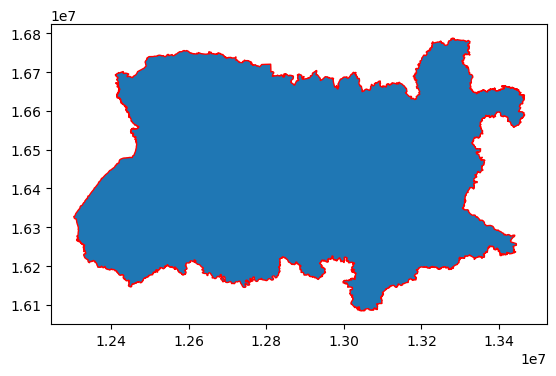

In [36]:
ukraine_municipalities.cx[:centroidX,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

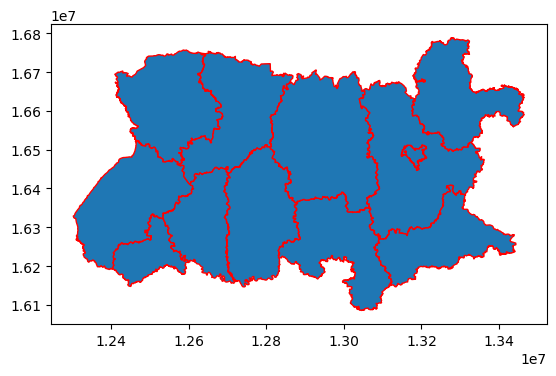

In [37]:
ukraine_municipalities.cx[:centroidX,centroidY:].dissolve(by='ADM1_UA').plot(edgecolor='red')

In [38]:
ukraine_municipalities.cx[:centroidX,centroidY:].unary_union
type(ukraine_municipalities.cx[:centroidX,centroidY:].unary_union)

shapely.geometry.polygon.Polygon

In [39]:
gpd.GeoDataFrame(index=[0],
                 crs=ukraine_municipalities.crs,
                 geometry=[ukraine_municipalities.cx[:centroidX,centroidY:].unary_union])

,geometry
0,"POLYGON ((12467303.488 16160398.467, 12467145...."


In [40]:
# you create
Ukraine_topLeft=ukraine_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
Ukraine_topLeft

,geometry,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
0,"POLYGON ((12467303.488 16160398.467, 12467145....",Vinnytskyi,Вінницький,Винницкий,UA0502,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.066637,0.850692


In [41]:
Ukraine_topLeft['zone']='NW' # agregamos la columna
Ukraine_topLeft=Ukraine_topLeft.loc[:,['ADM0_UA','zone','geometry']]  

# resulta
Ukraine_topLeft

,ADM0_UA,zone,geometry
0,Україна,NW,"POLYGON ((12467303.488 16160398.467, 12467145...."


In [42]:
Ukraine_topRight=ukraine_municipalities.cx[centroidX:,centroidY:].dissolve()
Ukraine_bottomLeft=ukraine_municipalities.cx[:centroidX,:centroidY].dissolve()
Ukraine_bottomRight=ukraine_municipalities.cx[centroidX:,:centroidY].dissolve()

Ukraine_topRight['zone']='NE'
Ukraine_topRight=Ukraine_topRight.loc[:,['ADM0_UA','zone','geometry']] 

Ukraine_bottomLeft['zone']='NE'
Ukraine_bottomLeft=Ukraine_bottomLeft.loc[:,['ADM0_UA','zone','geometry']] 

Ukraine_bottomRight['zone']='NE'
Ukraine_bottomRight=Ukraine_bottomRight.loc[:,['ADM0_UA','zone','geometry']] 

In [43]:
ukraine_municipalities

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Bakhchysaraiskyi,Бахчисарайський,Бахчисарайский,UA0102,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,3.835411,0.270255,"POLYGON ((13527290.201 15573762.242, 13527317...."
1,Bilohirskyi,Білогірський,Белогорский,UA0104,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.565672,0.335566,"MULTIPOLYGON (((13684485.569 15678495.365, 136..."
2,Dzhankoiskyi,Джанкойський,Джанкойский,UA0106,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.921192,0.251445,"MULTIPOLYGON (((13644003.970 15700023.834, 136..."
3,Yevpatoriiskyi,Євпаторійський,Евпаторийский,UA0108,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.813707,0.444439,"POLYGON ((13466267.965 15700460.385, 13466317...."
4,Kerchynskyi,Керченський,Керченский,UA0110,NaN,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.979506,0.346806,"MULTIPOLYGON (((13728654.779 15630422.020, 137..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Novhorod-Siverskyi,Новгород-Сіверський,Новгород-Северский,UA7406,NaN,Chernihivska,Чернігівська,Черниговская,UA74,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.682454,0.605959,"MULTIPOLYGON (((13434118.130 16692341.560, 134..."
135,Prylutskyi,Прилуцький,Прилукский,UA7408,NaN,Chernihivska,Чернігівська,Черниговская,UA74,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.769712,0.663146,"POLYGON ((13403537.213 16588368.397, 13404123...."
136,Chernihivskyi,Чернігівський,Черниговский,UA7410,NaN,Chernihivska,Чернігівська,Черниговская,UA74,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,9.065187,1.323391,"POLYGON ((13280627.520 16788192.220, 13280637...."
137,Kyiv,Київ,Киев,UA8000,NaN,Kyiv,Київ,Киев,UA80,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,2.900245,0.104409,"POLYGON ((13203035.491 16511759.627, 13205058...."


In [44]:
# primero
rowsCX=(ukraine_municipalities.cx[:centroUkraine.x[0],centroUkraine.y[0]:].shape[0],\
        ukraine_municipalities.cx[centroUkraine.x[0]:,centroUkraine.y[0]:].shape[0],\
        ukraine_municipalities.cx[:centroUkraine.x[0],:centroUkraine.y[0]].shape[0],\
        ukraine_municipalities.cx[centroUkraine.x[0]:,:centroUkraine.y[0]].shape[0])

sum(rowsCX)

177

In [45]:
# luego
len(set(ukraine_municipalities.cx[:centroUkraine.x[0],centroUkraine.y[0]:].ADM2_PCODE). \
intersection(set(ukraine_municipalities.cx[centroUkraine.x[0]:,centroUkraine.y[0]:].ADM2_PCODE)). \
intersection(set(ukraine_municipalities.cx[:centroUkraine.x[0],:centroUkraine.y[0]].ADM2_PCODE)). \
intersection(set(ukraine_municipalities.cx[centroUkraine.x[0]:,:centroUkraine.y[0]].ADM2_PCODE)))

1

In [46]:
ukraine_municipalities.shape[0]

139

<Axes: >

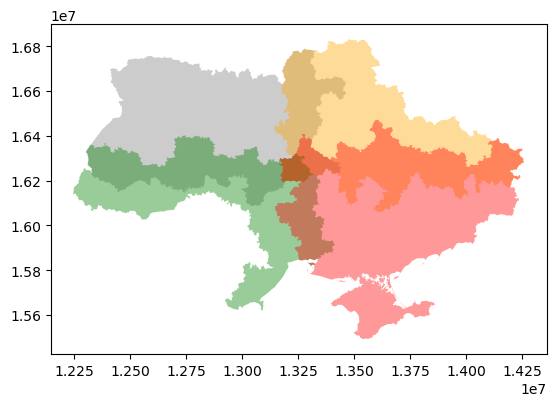

In [47]:
#finalmente
base=Ukraine_topLeft.plot(facecolor='grey', alpha=0.4)
Ukraine_topRight.plot(ax=base,facecolor='orange', alpha=0.4)
Ukraine_bottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Ukraine_bottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [48]:
############################# ejercicio 5 ############################################

In [49]:
Ukraine_AirTopLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,centroidY:]
Ukraine_AirTopRight=airports[airports.kind=='medium_airport'].cx[centroidX:,centroidY:]
Ukraine_AirBottomLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,:centroidY]
Ukraine_AirBottomRight=airports[airports.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

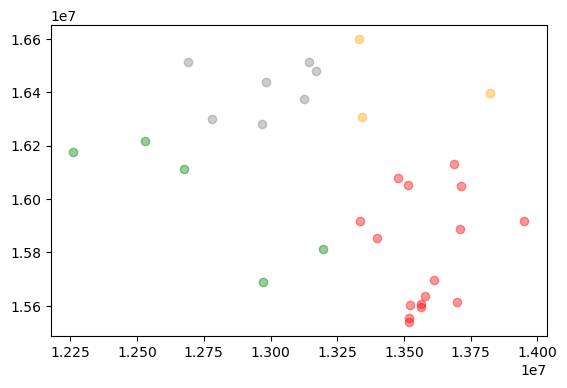

In [50]:
base=Ukraine_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Ukraine_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Ukraine_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Ukraine_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [51]:
Ukraine_AirBottomLeft

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
2,Odessa International Airport,medium_airport,46.426800,30.676500,172.0,Odessa Oblast,Odessa,POINT (13196667.668 15814518.993)
7,Uzhhorod International Airport,medium_airport,48.634300,22.263399,383.0,Zakarpattia Oblast,Uzhhorod,POINT (12260692.263 16177210.724)
10,Chernivtsi International Airport,medium_airport,48.259300,25.980801,826.0,Chernivtsi Oblast,Chernivtsi,POINT (12674261.104 16114500.763)
11,Ivano-Frankivsk International Airport,medium_airport,48.884201,24.686100,919.0,Ivano-Frankivsk Oblast,Ivano-Frankivsk,POINT (12530222.900 16219261.485)
15,Zhovtneve Air Base,medium_airport,45.639999,28.670000,NaN,Odessa Oblast,Bolgrad,POINT (12973440.266 15688838.847)


<Axes: >

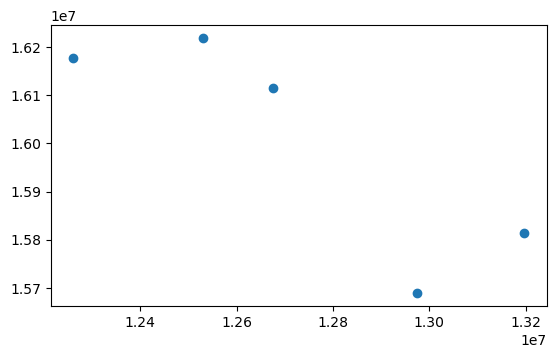

In [52]:
Ukraine_AirBottomLeft.convex_hull.plot()


<Axes: >

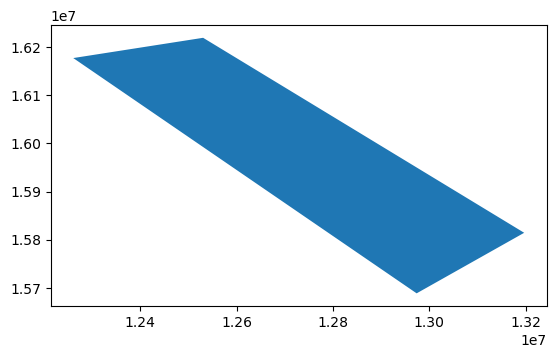

In [53]:
Ukraine_AirBottomLeft.dissolve().convex_hull.plot()

In [54]:
Ukraine_AirBottomLeft.dissolve().convex_hull

0    POLYGON ((12973440.266 15688838.847, 12260692....
dtype: geometry

<Axes: >

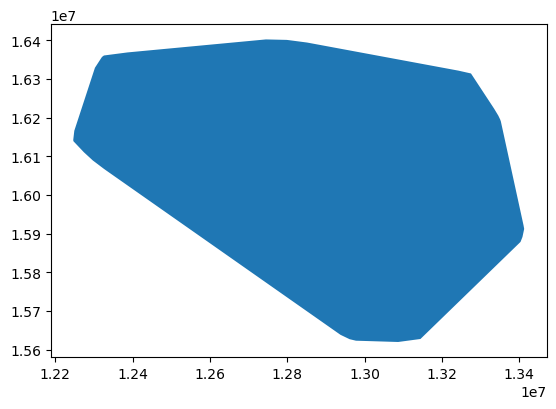

In [55]:
Ukraine_bottomLeft.convex_hull.plot()


<Axes: >

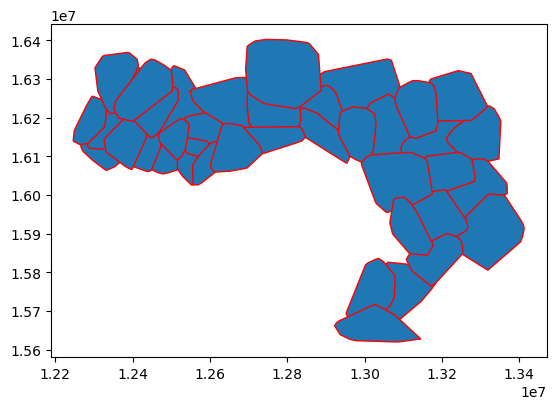

In [56]:
ukraine_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

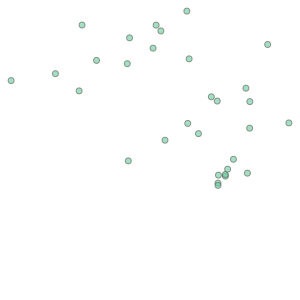

In [57]:
medium_airport=airports[airports.kind=='medium_airport']
medium_airport.unary_union

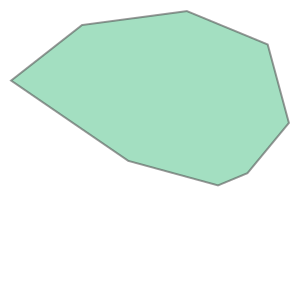

In [58]:
# hull de la unión
medium_airport.unary_union.convex_hull

In [59]:
MediumAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=medium_airport.crs,
                                    geometry=[medium_airport.unary_union.convex_hull])
MediumAirport_hull['name']='medium airports hull'

#luego

MediumAirport_hull

,geometry,name
0,"POLYGON ((13519089.695 15539718.646, 12973440....",medium airports hull


<Axes: >

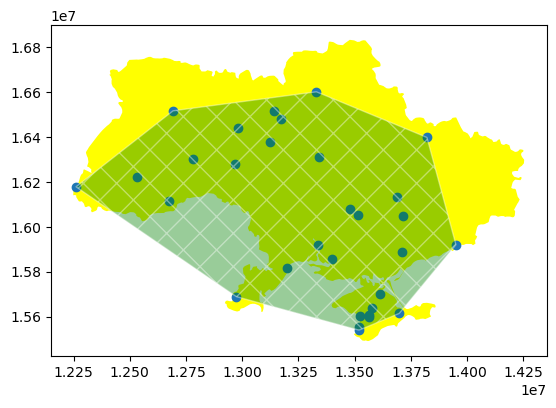

In [60]:
base=ukraine.plot(facecolor='yellow')
medium_airport.plot(ax=base)
MediumAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [61]:
############################# EJERCICIO 6 ##################################################

In [62]:
# norte
MunisN_ukraine=ukraine_municipalities.cx[:,centroidY:]
# sur
MunisS_ukraine=ukraine_municipalities.cx[:,:centroidY]
# oeste
MunisW_ukraine=ukraine_municipalities.cx[:centroidX,:]
#este
MunisE_ukraine=ukraine_municipalities.cx[centroidX:,:]

In [63]:
# APLICANDO LAS OPERACIONES PRESENTADAS EN CLASE

In [64]:
# INTERSECCIÓN
munisMidNS_ukraine=MunisN_ukraine.overlay(MunisS_ukraine, how="intersection",keep_geom_type=True)
munisMidNS_ukraine
MunisN_ukraine.sjoin(MunisS_ukraine, how="inner", predicate='contains')

,ADM2_EN_left,ADM2_UA_left,ADM2_RU_left,ADM2_PCODE_left,ADM2_REF_left,ADM1_EN_left,ADM1_UA_left,ADM1_RU_left,ADM1_PCODE_left,ADM0_EN_left,...,ADM1_PCODE_right,ADM0_EN_right,ADM0_UA_right,ADM0_RU_right,ADM0_PCODE_right,date_right,validOn_right,validTo_right,Shape_Leng_right,Shape_Area_right
10,Vinnytskyi,Вінницький,Винницкий,UA0502,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,...,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.066637,0.850692
11,Haisynskyi,Гайсинський,Гайсинский,UA0504,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,...,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.256638,0.691760
12,Zhmerynskyi,Жмеринський,Жмеринский,UA0506,NaN,Vinnytska,Вінницька,Винницкая,UA05,Ukraine,...,UA05,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.351904,0.386048
20,Dniprovskyi,Дніпровський,Днипровский,UA1202,NaN,Dnipropetrovska,Дніпропетровська,Днепропетровская,UA12,Ukraine,...,UA12,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.214613,0.681139
24,Novomoskovskyi,Новомосковський,Новомосковский,UA1210,NaN,Dnipropetrovska,Дніпропетровська,Днепропетровская,UA12,Ukraine,...,UA12,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.726245,0.425743
32,Kramatorskyi,Краматорський,Краматорский,UA1412,NaN,Donetska,Донецька,Донецкая,UA14,Ukraine,...,UA14,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,7.574815,0.634481
51,Ivano-Frankivskyi,Івано-Франківський,Ивано-Франковский,UA2604,NaN,Ivano-Frankivska,Івано-Франківська,Ивано-Франковская,UA26,Ukraine,...,UA26,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.742996,0.477717
52,Kaluskyi,Калуський,Калушский,UA2606,NaN,Ivano-Frankivska,Івано-Франківська,Ивано-Франковская,UA26,Ukraine,...,UA26,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.071737,0.438050
67,Oleksandriiskyi,Олександрійський,Александрийский,UA3508,NaN,Kirovohradska,Кіровоградська,Кировоградская,UA35,Ukraine,...,UA35,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,7.190987,0.661955
73,Sievierodonetskyi,Сєвєродонецький,Северодонецкий,UA4412,NaN,Luhanska,Луганська,Луганская,UA44,Ukraine,...,UA44,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.369443,0.330914


<Axes: >

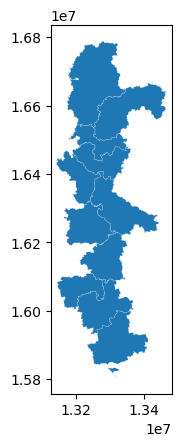

In [65]:
# mantenemos la sobreposición
munisMidWE_ukraine=MunisW_ukraine.overlay(MunisE_ukraine, how="intersection",keep_geom_type=True)
munisMidWE_ukraine.plot(edgecolor='white',linewidth=0.1)

In [66]:
# UNIÓN
# Veamos

munisMidNS_ukraine.info()
munisMidWE_ukraine.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ADM2_EN_1     26 non-null     object  
 1   ADM2_UA_1     26 non-null     object  
 2   ADM2_RU_1     26 non-null     object  
 3   ADM2_PCODE_1  26 non-null     object  
 4   ADM2_REF_1    0 non-null      float64 
 5   ADM1_EN_1     26 non-null     object  
 6   ADM1_UA_1     26 non-null     object  
 7   ADM1_RU_1     26 non-null     object  
 8   ADM1_PCODE_1  26 non-null     object  
 9   ADM0_EN_1     26 non-null     object  
 10  ADM0_UA_1     26 non-null     object  
 11  ADM0_RU_1     26 non-null     object  
 12  ADM0_PCODE_1  26 non-null     object  
 13  date_1        26 non-null     object  
 14  validOn_1     26 non-null     object  
 15  validTo_1     0 non-null      float64 
 16  Shape_Leng_1  26 non-null     float64 
 17  Shape_Area_1  26 non-null     float64 
 18  ADM2

In [67]:
keep=['ADM0_UA_1','ADM1_UA_1','ADM2_UA_1','geometry']
munisMidNS_ukraine=munisMidNS_ukraine.loc[:,keep]
munisMidWE_ukraine=munisMidWE_ukraine.loc[:,keep]

In [68]:
# Ahora
munisMidNS_ukraine.overlay(munisMidWE_ukraine,how="union",keep_geom_type=True)

,ADM0_UA_1_1,ADM1_UA_1_1,ADM2_UA_1_1,ADM0_UA_1_2,ADM1_UA_1_2,ADM2_UA_1_2,geometry
0,Україна,Черкаська,Звенигородський,Україна,Черкаська,Звенигородський,"POLYGON ((13242929.892 16321096.063, 13243077...."
1,Україна,Черкаська,Черкаський,Україна,Черкаська,Черкаський,"POLYGON ((13275599.482 16408328.809, 13275745...."
2,Україна,Вінницька,Вінницький,NaN,NaN,NaN,"POLYGON ((13063835.034 16349372.944, 13064118...."
3,Україна,Вінницька,Гайсинський,NaN,NaN,NaN,"POLYGON ((13063321.976 16257727.873, 13064268...."
4,Україна,Вінницька,Жмеринський,NaN,NaN,NaN,"POLYGON ((12897574.635 16283133.483, 12897642...."
5,Україна,Хмельницька,Хмельницький,NaN,NaN,NaN,"POLYGON ((12750271.625 16398972.251, 12750345...."
6,Україна,Черкаська,Уманський,NaN,NaN,NaN,"POLYGON ((13138877.019 16294297.129, 13138907...."
7,Україна,Хмельницька,Кам'янець-Подільський,NaN,NaN,NaN,"POLYGON ((12714737.536 16266594.053, 12714852...."
8,Україна,Дніпропетровська,Дніпровський,NaN,NaN,NaN,"POLYGON ((13637511.999 16257195.772, 13638381...."
9,Україна,Дніпропетровська,Новомосковський,NaN,NaN,NaN,"POLYGON ((13671921.320 16271266.758, 13671931...."


In [69]:
# appending
pd.concat([munisMidNS_ukraine,munisMidWE_ukraine],ignore_index=True)

,ADM0_UA_1,ADM1_UA_1,ADM2_UA_1,geometry
0,Україна,Вінницька,Вінницький,"POLYGON ((13063835.034 16349372.944, 13064118...."
1,Україна,Вінницька,Гайсинський,"POLYGON ((13063321.976 16257727.873, 13064268...."
2,Україна,Вінницька,Жмеринський,"POLYGON ((12897574.635 16283133.483, 12897642...."
3,Україна,Хмельницька,Хмельницький,"POLYGON ((12750271.625 16398972.251, 12750345...."
4,Україна,Черкаська,Уманський,"POLYGON ((13137985.792 16294253.949, 13138877...."
5,Україна,Хмельницька,Кам'янець-Подільський,"POLYGON ((12714737.536 16266594.053, 12714852...."
6,Україна,Дніпропетровська,Дніпровський,"POLYGON ((13637511.999 16257195.772, 13638381...."
7,Україна,Дніпропетровська,Новомосковський,"POLYGON ((13671921.320 16271266.758, 13671931...."
8,Україна,Полтавська,Полтавський,"POLYGON ((13612026.954 16468093.023, 13612113...."
9,Україна,Харківська,Красноградський,"POLYGON ((13756406.846 16357485.432, 13757965...."


<Axes: >

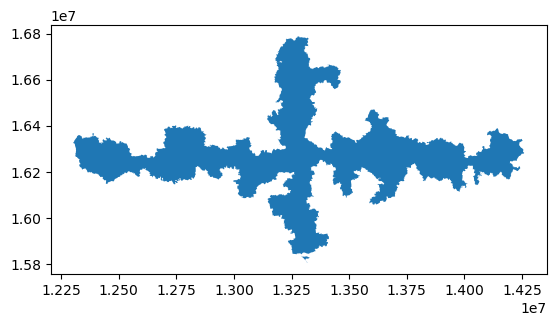

In [70]:
munisMidNS_ukraine.dissolve().overlay(munisMidWE_ukraine.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [71]:
muniMidUkraine=munisMidNS_ukraine.dissolve().overlay(munisMidWE_ukraine.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidUkraine

,geometry,ADM0_UA_1_1,ADM1_UA_1_1,ADM2_UA_1_1,ADM0_UA_1_2,ADM1_UA_1_2,ADM2_UA_1_2
0,"MULTIPOLYGON (((13298631.035 15832284.142, 132...",Україна,Вінницька,Вінницький,Україна,Чернігівська,Чернігівський


In [72]:
# some cleaning

muniMidUkraine['zone']='middles'
muniMidUkraine=muniMidUkraine.loc[:,['ADM0_UA_1_1','zone','geometry']]   
muniMidUkraine

,ADM0_UA_1_1,zone,geometry
0,Україна,middles,"MULTIPOLYGON (((13298631.035 15832284.142, 132..."


In [73]:
################# PARA EL NUEVO MAPA ##################

In [74]:
# aeropuertos medio tamaño
Ukraine_AirTopLeft_hull=Ukraine_AirTopLeft.dissolve().convex_hull
Ukraine_AirTopRight_hull=Ukraine_AirTopRight.dissolve().convex_hull
Ukraine_AirBottomLeft_hull=Ukraine_AirBottomLeft.dissolve().convex_hull
Ukraine_AirBottomRight_hull=Ukraine_AirBottomRight.dissolve().convex_hull

<Axes: >

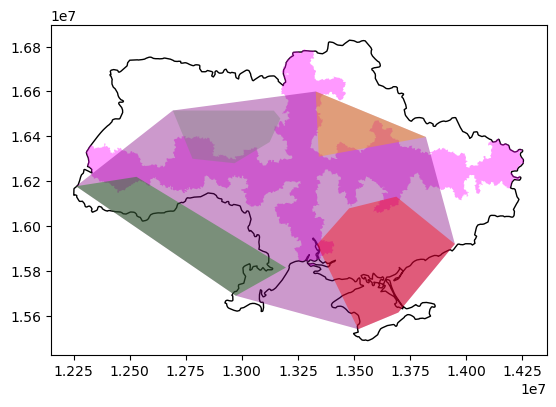

In [75]:
base = ukraine.plot(color='white', edgecolor='black') #unprojected
muniMidUkraine.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
MediumAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Ukraine_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Ukraine_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Ukraine_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Ukraine_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

<Axes: >

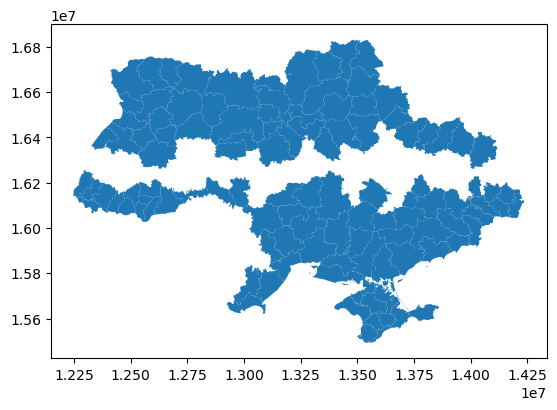

In [76]:
# diferencia geométrica

MunisN_ukraine.overlay(MunisS_ukraine, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

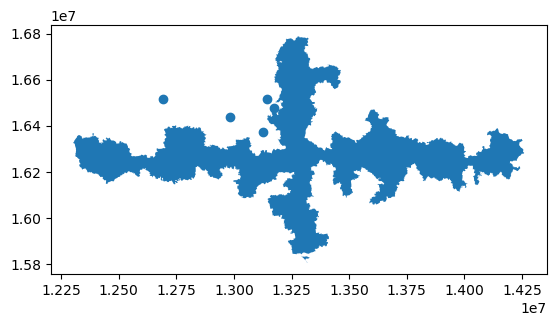

In [78]:
################################################ DUDAS ###################################################################
Ukraine_AirTopLeft.overlay(muniMidUkraine, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

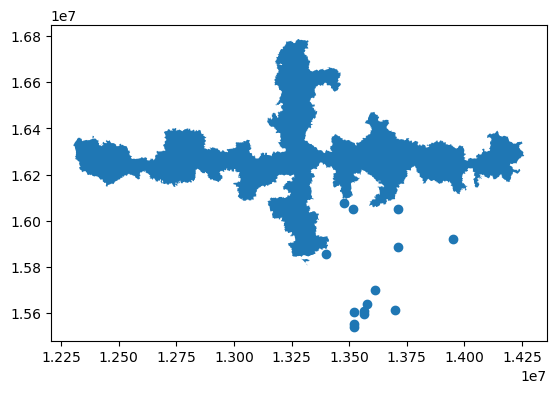

In [80]:
Ukraine_AirBottomRight.overlay(muniMidUkraine, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

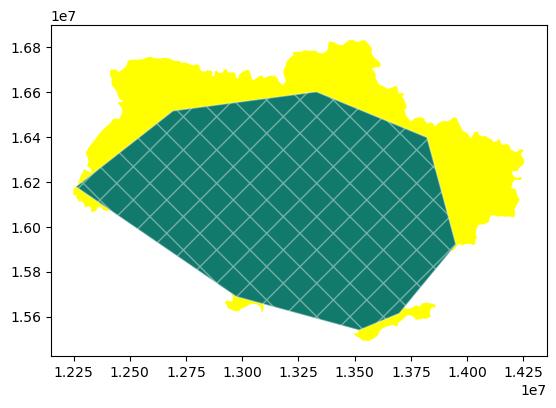

In [86]:

base=ukraine.plot(facecolor='yellow')
MediumAirport_hull.plot(ax=base)
MediumAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

<Axes: >

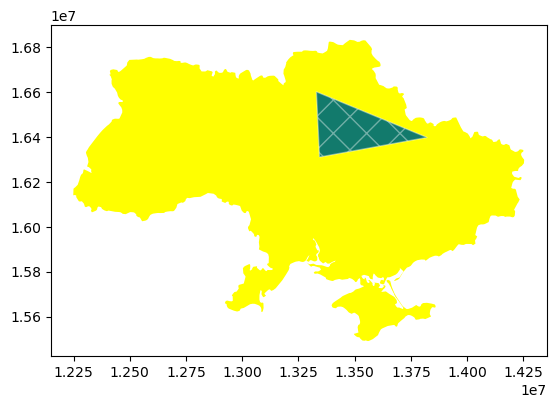

In [87]:
base=ukraine.plot(facecolor='yellow')
Ukraine_AirTopRight_hull.plot(ax=base)
Ukraine_AirTopRight_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')